In [2]:
from graph_tool.all import *


(ipykernel_launcher:13022): Gtk-WARNING **: 12:49:21.447: Locale not supported by C library.
	Using the fallback 'C' locale.


In [2]:
print(type(graph_tool.collection.data))

<class 'graph_tool.collection.LazyDataDict'>


<Graph object, undirected, with 34 vertices and 78 edges, 1 internal vertex property, 2 internal graph properties, at 0x15ee40ca0>


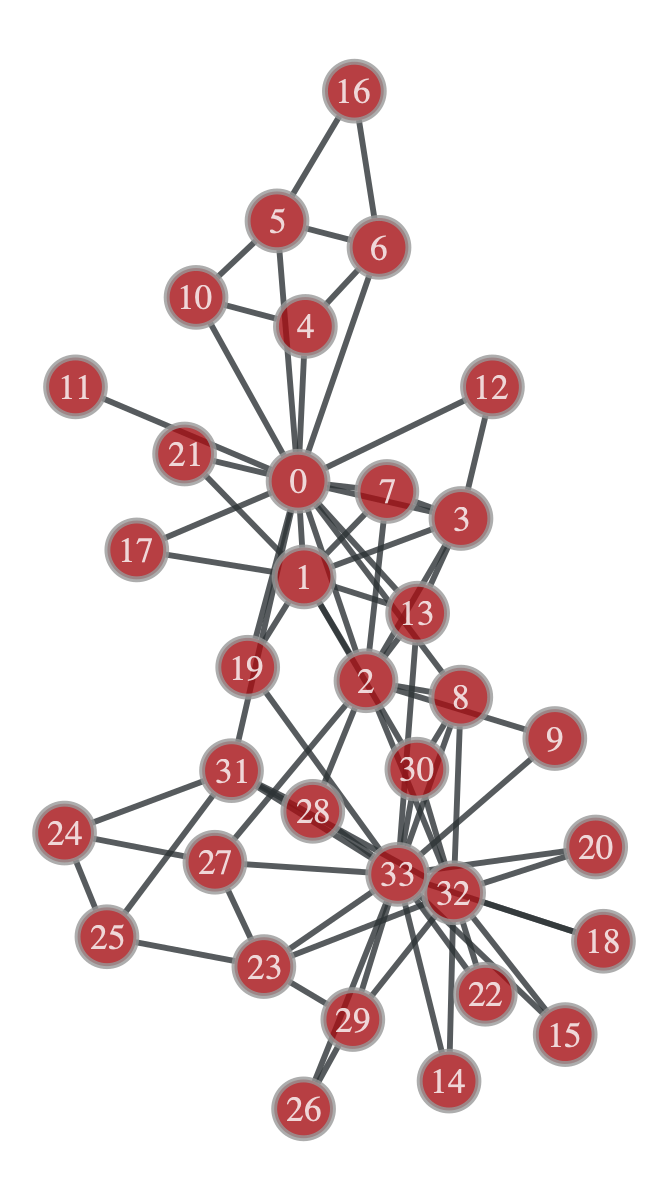

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x15ee40ca0, at 0x160490ac0>

In [61]:
g = graph_tool.collection.data["karate"]
print(g)
graph_draw(g,vertex_text=g.vertex_index)


In [62]:
print(type(g.vertex_properties.keys))
print(g.vertex_properties.keys)
print(g.edge_properties.keys)
print(g.graph_properties.keys)
print(type(g.vertex_properties["pos"]))
print(g.vertex_properties["pos"].data_ptr())
vpos = g.vertex_properties["pos"] 
print(type(vpos))
print(vpos[g.vertex(5)])
print(vpos[g.vertex(0)])
print(vpos[g.vertex(33)])
print(vpos[g.vertex(26)])


<class 'method'>
<bound method PropertyDict.keys of {'pos': <VertexPropertyMap object with value type 'vector<double>', for Graph 0x15ee40ca0, at 0x102f52f40>}>
<bound method PropertyDict.keys of {}>
<bound method PropertyDict.keys of {'description': <GraphPropertyMap object with value type 'string', for Graph 0x15ee40ca0, at 0x15f33cca0>, 'readme': <GraphPropertyMap object with value type 'string', for Graph 0x15ee40ca0, at 0x15f33cf40>}>
<class 'graph_tool.VertexPropertyMap'>
140223298268672
<class 'graph_tool.VertexPropertyMap'>
array([-101.33629037,  -21.68011496])
array([-97.51889153, -18.55198439])
array([-91.17495687, -15.02842102])
array([-86.42559787, -14.2439349 ])


Playing around link clustering

In [84]:
# print(g.edge_index_range)
# for i in range(g.edge_index_range):
#     link_betweenness_prop = graph_tool.centrality.betweenness(g)[1]
#     mostCentral = max(link_betweenness_prop.a)
#     for e in g.edges():
#         if link_betweenness_prop[e]==mostCentral:
#             g.remove_edge(e)
#             break
#         print(link_betweenness_prop[e])
#     graph_draw(g,vertex_text=g.vertex_index)



# print(link_betweenness_prop.a)
# print(type(link_betweenness_prop.a))
# print(max(link_betweenness_prop.a))


78


NameError: name 'mostCentralEdge' is not defined

In [25]:
# g = graph_tool.collection.data["karate"]

# # graph_draw(g,vertex_text=g.vertex_index)
# e = g.edges().next()

# link_betweenness_prop = g.new_edge_property("double")

# print(type(link_betweenness_prop))

# link_betweenness_prop[g.edges()] = graph_tool.centrality.betweenness(g)[1]
# print(graph_tool.centrality.betweenness(g)[1])
# # print(g.edge_properties())

# # print(g.get_edges().size)
# print(g.list_properties())
# # print(g.get_edges(['pos']))



# # g.remove_edge(e)
# # print(g.get_edges().size)
# # graph_draw(g,vertex_text=g.vertex_index)



<class 'graph_tool.EdgePropertyMap'>


TypeError: float() argument must be a string or a number, not 'EdgePropertyMap'

In [41]:
g = graph_tool.collection.data["karate"]



link_betweenness_prop = g.new_edge_property("double")
g.edge_properties["betweenness"] = link_betweenness_prop
graph_tool.centrality.betweenness(g,eprop=link_betweenness_prop)



print(g.list_properties())
print(g.get_edges())
print(g.edge_properties["betweenness"].a[0])
print(type(g.edge_properties["betweenness"].a[0]))
# print(g.get_edges(eprops=link_betweenness_prop))

e = g.edge(6, 0)
print(link_betweenness_prop[e])
e = g.edge(33, 8)
print(link_betweenness_prop[e])


description     (graph)   (type: string, val: Zachary's karate club: social
                                              network of friendships between 34
                                              members of a karate club at a US
                                              university in the 1970s. Please
                                              cite W. W. Zachary, An
                                              information flow model for
                                              conflict and fission in small
                                              groups, Journal of
                                              Anthropological Research 33,
                                              452-473 (1977). Retrieved from
                                              `Mark Newman's website
                                              <http://www-personal.umich.edu/~m
                                              ejn/netdata/>`_.)
readme          (graph)   (type: string

In [48]:
print(len(graph_tool.centrality.betweenness(g)[1].a))
print(len(g.get_edges()))

78
70
